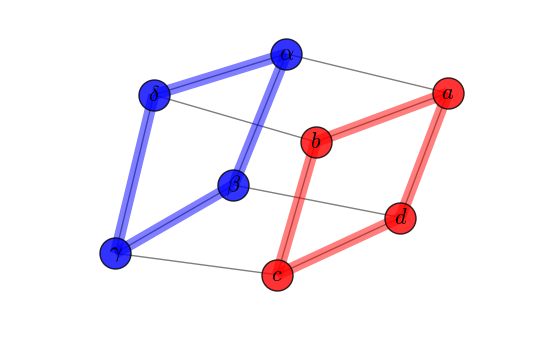

In [26]:
import matplotlib.pyplot as plt

import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
               alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
               alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.show() # display

graph has 779 nodes with 1073 edges
137 connected components


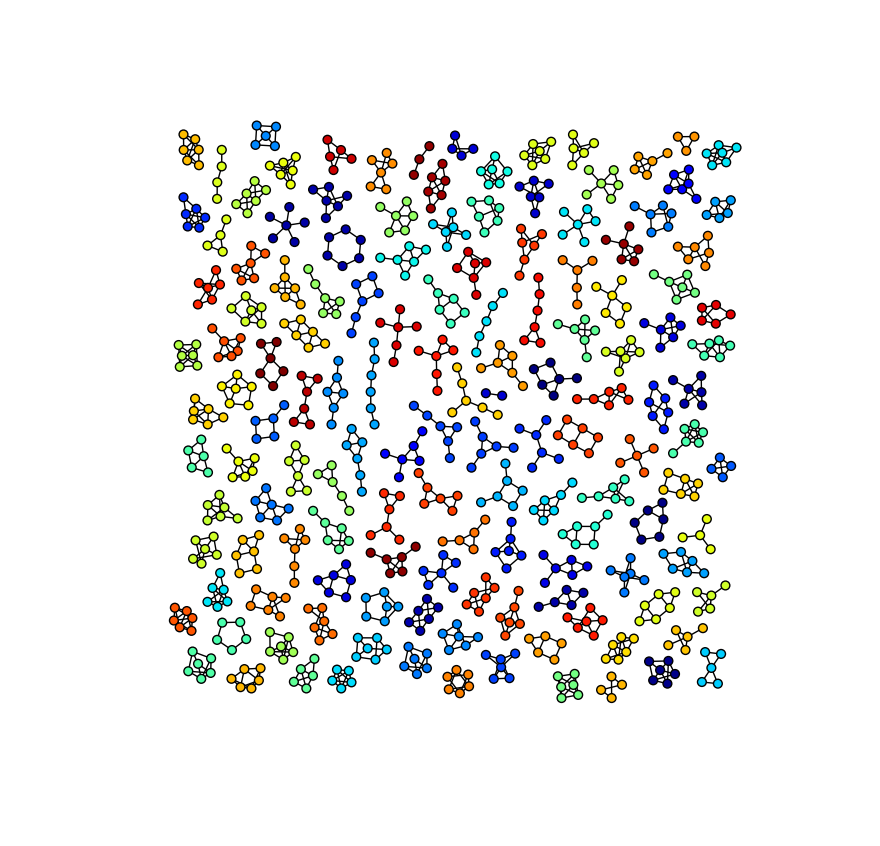

In [23]:
"""
Atlas of all graphs of 6 nodes or less.

"""
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx
from networkx.generators.atlas import *
from networkx.algorithms.isomorphism.isomorph import graph_could_be_isomorphic as isomorphic
import random

def atlas6():
    """ Return the atlas of all connected graphs of 6 nodes or less.
        Attempt to check for isomorphisms and remove.
    """

    Atlas = graph_atlas_g()[0:208] # 208
    # remove isolated nodes, only connected graphs are left
    U = nx.Graph() # graph for union of all graphs in atlas
    for G in Atlas:
        zerodegree = [n for n in G if G.degree(n)==0]
        for n in zerodegree:
            G.remove_node(n)
        U = nx.disjoint_union(U, G)

    # list of graphs of all connected components
    C = nx.connected_component_subgraphs(U)

    UU = nx.Graph()
    # do quick isomorphic-like check, not a true isomorphism checker
    nlist = [] # list of nonisomorphic graphs
    for G in C:
        # check against all nonisomorphic graphs so far
        if not iso(G, nlist):
            nlist.append(G)
            UU = nx.disjoint_union(UU, G) # union the nonisomorphic graphs
    return UU

def iso(G1, glist):
    """Quick and dirty nonisomorphism checker used to check isomorphisms."""
    for G2 in glist:
        if isomorphic(G1, G2):
            return True
    return False


if __name__ == '__main__':
    G=atlas6()

    print("graph has %d nodes with %d edges"\
          %(nx.number_of_nodes(G), nx.number_of_edges(G)))
    print(nx.number_connected_components(G), "connected components")

    try:
        import pygraphviz
        from networkx.drawing.nx_agraph import graphviz_layout
    except ImportError:
        try:
            import pydotplus
            from networkx.drawing.nx_pydot import graphviz_layout
        except ImportError:
            raise ImportError("This example needs Graphviz and either "
                              "PyGraphviz or PyDotPlus")

    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(8, 8))
    # layout graphs with positions using graphviz neato
    pos = graphviz_layout(G, prog="neato")
    # color nodes the same in each connected subgraph
    C = nx.connected_component_subgraphs(G)
    for g in C:
        c = [random.random()] * nx.number_of_nodes(g) # random color...
        nx.draw(g,
             pos,
             node_size=40,
             node_color=c,
             vmin=0.0,
             vmax=1.0,
             with_labels=False
             )
    plt.show()

In [27]:
"""
An example showing how to use the interface to the pygraphviz
AGraph class to convert to and from graphviz.

Also see the pygraphviz documentation and examples at
http://pygraphviz.github.io/


"""
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2006-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx

# plain graph

G = nx.complete_graph(5)   # start with K5 in networkx
A = nx.nx_agraph.to_agraph(G)        # convert to a graphviz graph
X1 = nx.nx_agraph.from_agraph(A)     # convert back to networkx (but as Graph)
X2 = nx.Graph(A)          # fancy way to do conversion
G1 = nx.Graph(X1)          # now make it a Graph

A.write('k5.dot')     # write to dot file
X3 = nx.nx_agraph.read_dot('k5.dot') # read from dotfile

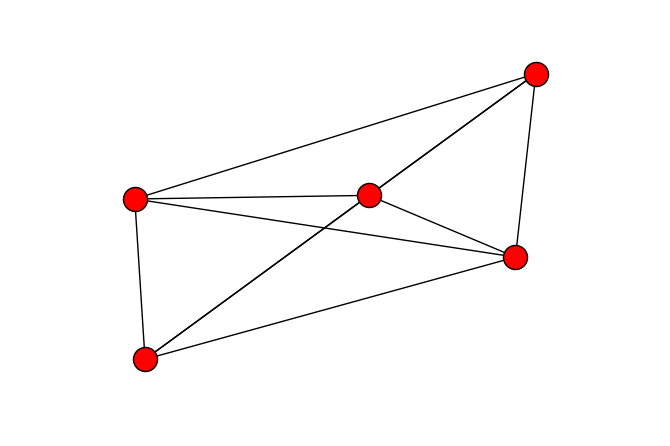

In [30]:
import matplotlib.pyplot as plt
nx.draw(X3)
plt.show()